# <center> Importing libraries and datasets</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [51]:
data=pd.read_csv('/content/fake_job_postings.csv')

# <center> Exploratory Data Analysis </center>

In [ ]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
data.shape

(17880, 18)

In [ ]:
data['fraudulent'].value_counts()

,count
fraudulent,
0,17014
1,866


<ipython-input-12-78a7b8fa57d7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="fraudulent",data =data, palette=["#FF5733", "#3399FF", "#33FF7A"])
<ipython-input-12-78a7b8fa57d7>:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x="fraudulent",data =data, palette=["#FF5733", "#3399FF", "#33FF7A"])


<Axes: xlabel='fraudulent', ylabel='count'>

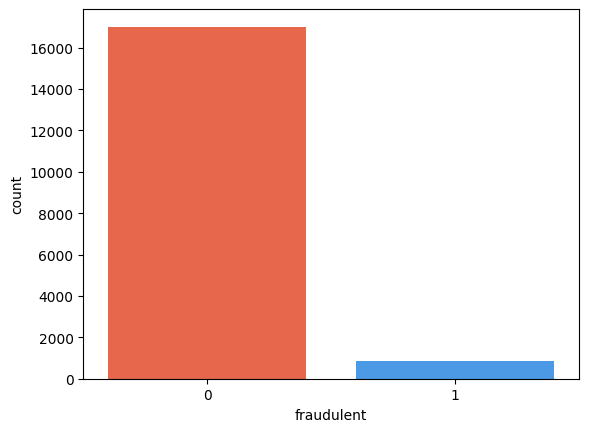

In [ ]:
sns.countplot(x="fraudulent",data =data, palette=["#FF5733", "#3399FF", "#33FF7A"])

<ipython-input-53-730a8789291e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fraudulent', y='country', data=top_10_countries, palette='viridis')


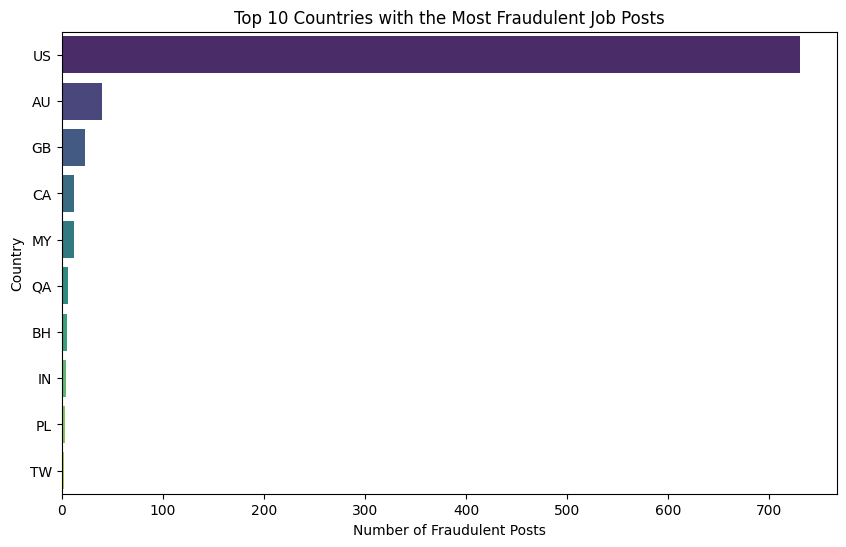

In [53]:
df=data.copy()
df['country'] = df['location'].str.split(',').str[0]

# Step 2: Group by country and count the fraudulent posts
fraud_by_country = df.groupby('country')['fraudulent'].sum().reset_index()

# Step 3: Sort countries by the number of fraudulent posts in descending order
fraud_by_country = fraud_by_country.sort_values(by='fraudulent', ascending=False)

# Step 4: Select the top 10 countries
top_10_countries = fraud_by_country.head(10)

# Step 5: Plot the results using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='fraudulent', y='country', data=top_10_countries, palette='viridis')
plt.title('Top 10 Countries with the Most Fraudulent Job Posts')
plt.xlabel('Number of Fraudulent Posts')
plt.ylabel('Country')
plt.show()

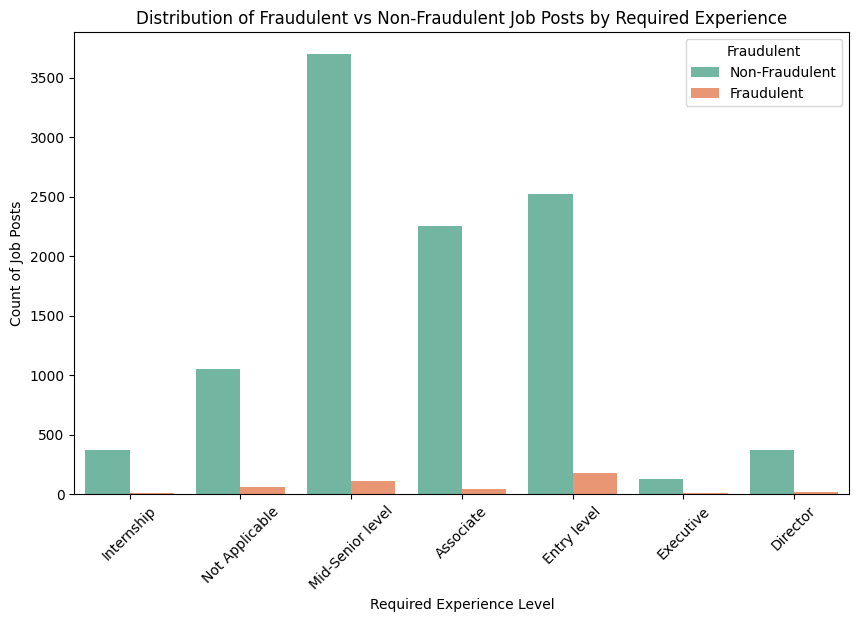

In [54]:
plt.figure(figsize=(10, 6))
sns.countplot(x='required_experience', hue='fraudulent', data=df, palette='Set2')

# Step 2: Customize the plot
plt.title('Distribution of Fraudulent vs Non-Fraudulent Job Posts by Required Experience')
plt.xlabel('Required Experience Level')
plt.ylabel('Count of Job Posts')
plt.legend(title='Fraudulent', labels=['Non-Fraudulent', 'Fraudulent'])
plt.xticks(rotation=45)  # Rotate labels for better readability if necessary

# Step 3: Show the plot
plt.show()

<ipython-input-58-30dadadd8af5>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xlabels,  fontsize=10)
<ipython-input-58-30dadadd8af5>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ylabels,  fontsize=10)
<ipython-input-58-30dadadd8af5>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xlabels,  fontsize=10)
<ipython-input-58-30dadadd8af5>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ylabels,  fontsize=10)
<ipython-input-58-30dadadd8af5>:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax

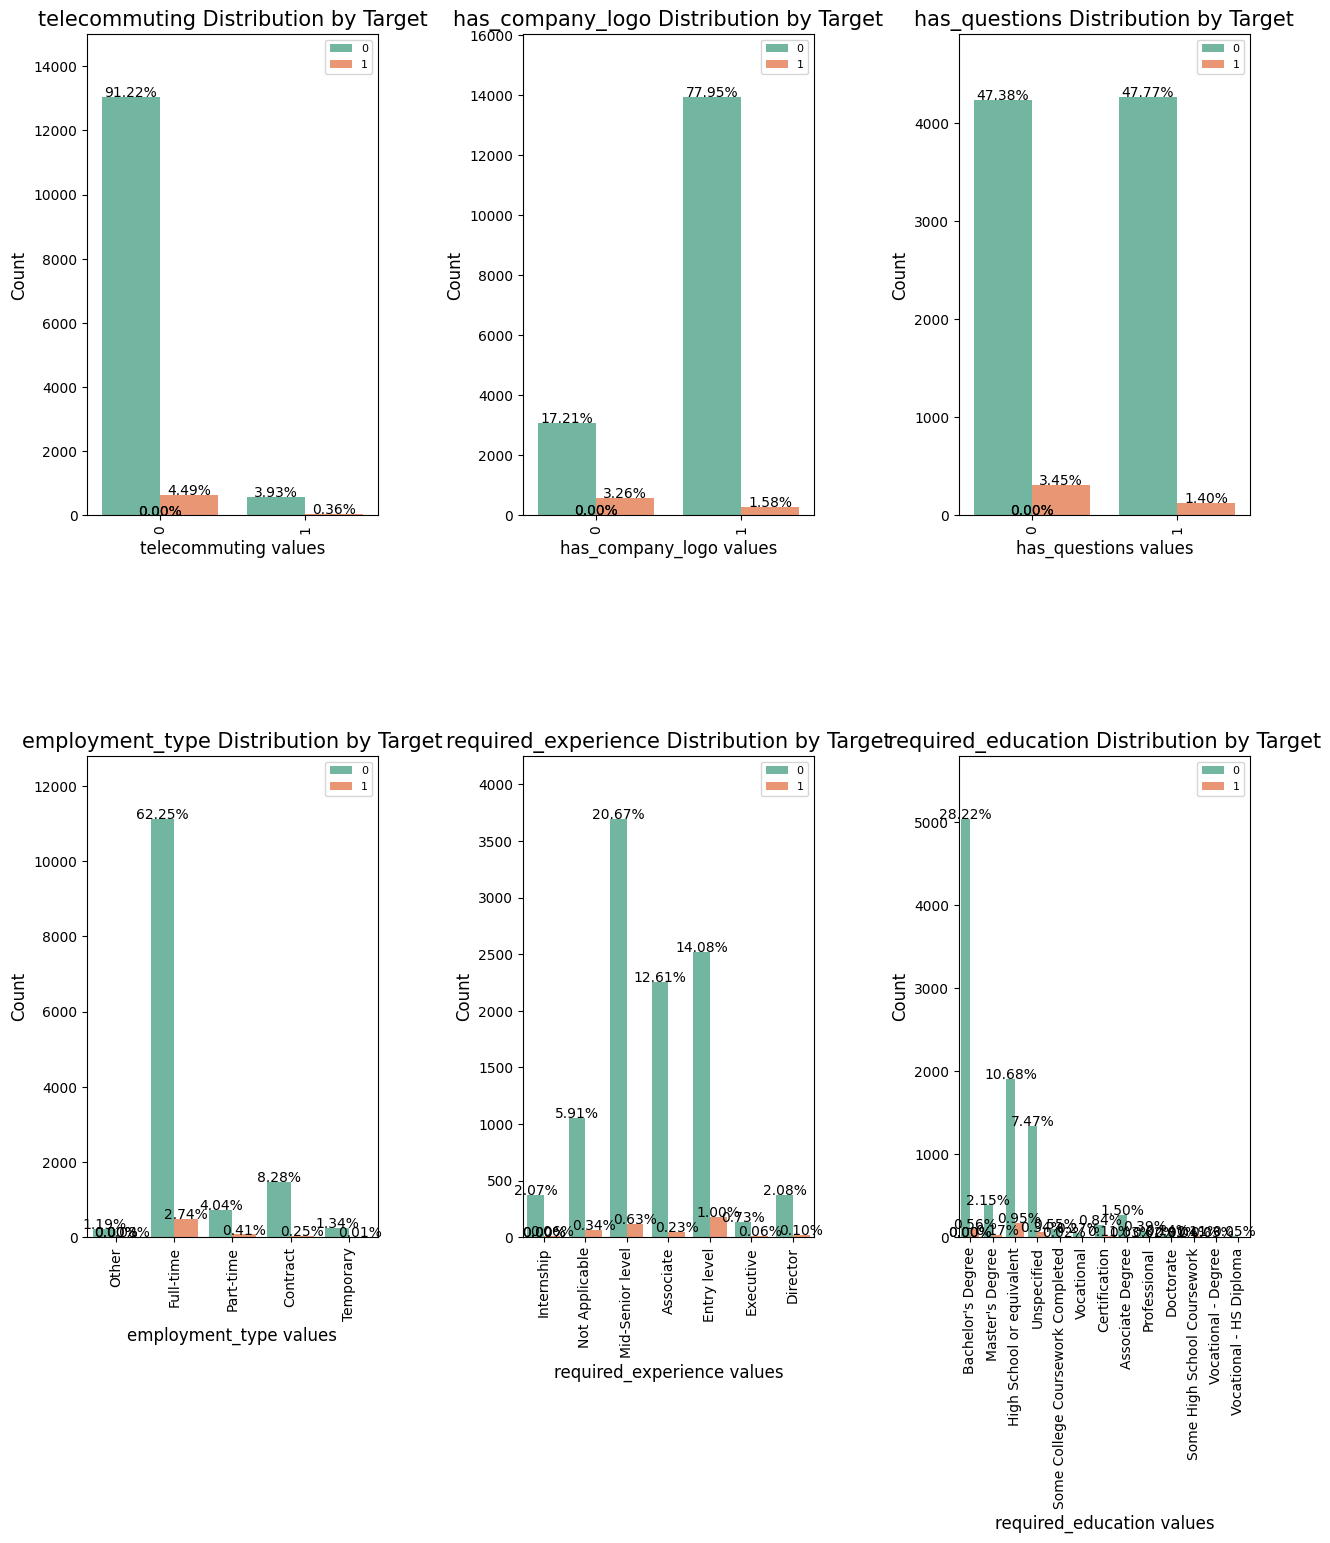

In [58]:
cat_cols = ["telecommuting", "has_company_logo", "has_questions", "employment_type", "required_experience", "required_education",]
# visualizating catagorical variable by target
import matplotlib.gridspec as gridspec # to do the grid of plots
grid = gridspec.GridSpec(3, 3, wspace=0.5, hspace=0.5) # The grid of chart
plt.figure(figsize=(15,25)) # size of figure

# loop to get column and the count of plots
for n, col in enumerate(df[cat_cols]):
    ax = plt.subplot(grid[n]) # feeding the figure of grid
    sns.countplot(x=col, data=df, hue='fraudulent', palette='Set2')
    ax.set_ylabel('Count', fontsize=12) # y axis label
    ax.set_title(f'{col} Distribution by Target', fontsize=15) # title label
    ax.set_xlabel(f'{col} values', fontsize=12) # x axis label
    xlabels = ax.get_xticklabels()
    ylabels = ax.get_yticklabels()
    ax.set_xticklabels(xlabels,  fontsize=10)
    ax.set_yticklabels(ylabels,  fontsize=10)
    plt.legend(fontsize=8)
    plt.xticks(rotation=90)
    total = len(df)
    sizes=[] # Get highest values in y
    for p in ax.patches: # loop to all objects
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=10)
    ax.set_ylim(0, max(sizes) * 1.15) #set y limit based on highest heights


plt.show()

# <center> Data Preprocessing</center>

In [3]:
non_int_columns = data.select_dtypes(exclude=['int', 'int64']).columns
def str_df(df):
    for col in non_int_columns:
        df[col] = df[col].astype(str)
    return df
str_df(data)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,nan,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,nan,0,1,0,Other,Internship,nan,nan,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,nan,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,nan,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",nan,nan,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,nan,0,1,0,nan,nan,nan,nan,nan,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,nan,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",nan,nan,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,nan,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,nan,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,nan,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",nan,nan,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,nan,0,0,0,Full-time,nan,nan,nan,nan,0
17878,17879,Graphic Designer,"NG, LA, Lagos",nan,nan,nan,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [4]:
data['text'] = 'title '+data['title']+'company_profile '+data['company_profile']+'description '+data['description']+'requirements '+data['requirements']+'benefits '+data['benefits']+'required_education '+data['required_education']+'industry '+data['industry']


In [5]:
data.drop(columns=['title','company_profile','description','requirements','benefits','required_education','industry','department','salary_range','job_id','telecommuting','has_company_logo','has_questions'],inplace=True)

In [6]:
non_int_columns = data.select_dtypes(exclude=['int', 'int64']).columns

In [7]:
def clean_column(train):
  for col in non_int_columns:
    train[col] = train[col].str.replace(',', '')
    train[col] = train[col].str.replace(';', '')
    train[col] = train[col].str.replace(':', '')
    train[col] = train[col].str.replace('.', '')
    train[col] = train[col].str.replace('!', '')
    train[col] = train[col].str.replace('?', '')
    train[col] = train[col].str.replace('(', '')
    train[col] = train[col].str.replace(')', '')
    train[col] = train[col].str.replace('-', ' ')
    train[col] = train[col].str.replace('_', ' ')
    train[col] = train[col].str.replace('/', ' ')

clean_column(data)

In [8]:
def str_df(df):
    for col in non_int_columns:
        df[col] = df[col].astype(str)
    return df
str_df(data)

,location,employment_type,required_experience,function,fraudulent,text
0,US NY New York,Other,Internship,Marketing,0,title Marketing Interncompany profile We're Fo...
1,NZ Auckland,Full time,Not Applicable,Customer Service,0,title Customer Service Cloud Video Productio...
2,US IA Wever,nan,nan,nan,0,title Commissioning Machinery Assistant CMAcom...
3,US DC Washington,Full time,Mid Senior level,Sales,0,title Account Executive Washington DCcompany...
4,US FL Fort Worth,Full time,Mid Senior level,Health Care Provider,0,title Bill Review Managercompany profile SpotS...
...,...,...,...,...,...,...
17875,CA ON Toronto,Full time,Mid Senior level,Sales,0,title Account Director Distribution company ...
17876,US PA Philadelphia,Full time,Mid Senior level,Accounting Auditing,0,title Payroll Accountantcompany profile WebLin...
17877,US TX Houston,Full time,nan,nan,0,title Project Cost Control Staff Engineer Co...
17878,NG LA Lagos,Contract,Not Applicable,Design,0,title Graphic Designercompany profile nandescr...


In [9]:
def clean_Text(text):
    text=re.sub('@[A-Za-z0–9]+','',text) #Removing @mentions
    text=re.sub('#', '', text) # Removing '#' hash tag
    text=re.sub('RT[\s]+', '', text) # Removing RT
    text=re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    text=re.sub(':', '', text)
    text=re.sub("'", '', text)
    text=re.sub(",", '', text)
    text=re.sub(";", '', text)
    text=re.sub("&", '', text)
    text=re.sub("``", '', text)
    text=re.sub('"', '', text)
    return text

In [10]:
for col in non_int_columns:
    data[col]=data[col].apply(clean_Text)

In [ ]:
data.head()

,location,employment_type,required_experience,function,fraudulent,text
0,US NY New York,Other,Internship,Marketing,0,title Marketing Interncompany profile Were Foo...
1,NZ Auckland,Full time,Not Applicable,Customer Service,0,title Customer Service Cloud Video Productio...
2,US IA Wever,nan,nan,nan,0,title Commissioning Machinery Assistant CMAcom...
3,US DC Washington,Full time,Mid Senior level,Sales,0,title Account Executive Washington DCcompany...
4,US FL Fort Worth,Full time,Mid Senior level,Health Care Provider,0,title Bill Review Managercompany profile SpotS...


In [11]:
def tolist(x):
    return x.split(' ')
for col in ['text']:
    data[col]=data[col].apply(tolist)

In [ ]:
data.head()

,title,location,employment_type,required_experience,function,fraudulent,text
0,"[Marketing, Intern]",US NY New York,Other,Internship,Marketing,0,"[company, profile, Were, Food52, and, weve, cr..."
1,"[Customer, Service, , , Cloud, Video, Production]",NZ Auckland,Full time,Not Applicable,Customer Service,0,"[company, profile, 90, Seconds, the, worlds, C..."
2,"[Commissioning, Machinery, Assistant, CMA]",US IA Wever,nan,nan,nan,0,"[company, profile, Valor, Services, provides, ..."
3,"[Account, Executive, , , Washington, DC]",US DC Washington,Full time,Mid Senior level,Sales,0,"[company, profile, Our, passion, for, improvin..."
4,"[Bill, Review, Manager]",US FL Fort Worth,Full time,Mid Senior level,Health Care Provider,0,"[company, profile, SpotSource, Solutions, LLC,..."


In [12]:
data.drop(columns=['location'],inplace=True)

In [13]:
#remove null strings
def remove_empty(x):
    return [item for item in x if item != '']
for col in ['text']:
    data[col]=data[col].apply(remove_empty)

In [ ]:
data.head()

,employment_type,required_experience,function,fraudulent,text
0,Other,Internship,Marketing,0,"[title, Marketing, Interncompany, profile, Wer..."
1,Full time,Not Applicable,Customer Service,0,"[title, Customer, Service, Cloud, Video, Produ..."
2,nan,nan,nan,0,"[title, Commissioning, Machinery, Assistant, C..."
3,Full time,Mid Senior level,Sales,0,"[title, Account, Executive, Washington, DCcomp..."
4,Full time,Mid Senior level,Health Care Provider,0,"[title, Bill, Review, Managercompany, profile,..."


In [ ]:
def lower_case(data):
    for col in ['text']:
        for i in range(data.shape[0]) :
            data[col][i] = [x.lower() for x in data[col][i]]
    return data
lower_case(data)

In [15]:
from nltk.corpus import stopwords
nltk.download('stopwords')


stop_words = ['nan','amp','the','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
def remove_stopwords(data):
    for col in ['text']:
        for i in range(data.shape[0]) :
            for word in  stop_words:
                if word in data[col][i]:
                    data[col][i].remove(word)
    return data
data = remove_stopwords(data)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.isnull().sum()

,0
title,0
employment_type,0
required_experience,0
function,0
fraudulent,0
text,0


In [16]:
data.drop(columns=['function','employment_type','required_experience'],inplace=True)

In [17]:
non_int_columns = data.select_dtypes(exclude=['int', 'int64']).columns

In [ ]:
data.head()

,fraudulent,text
0,0,"[title, marketing, interncompany, profile, foo..."
1,0,"[title, customer, service, cloud, video, produ..."
2,0,"[title, commissioning, machinery, assistant, c..."
3,0,"[title, account, executive, washington, dccomp..."
4,0,"[title, bill, review, managercompany, profile,..."


In [ ]:
data.head()

,title,employment_type,required_experience,fraudulent,text
0,"[marketing, intern]",Other,Internship,0,"[company, profile, food52, weve, created, grou..."
1,"[customer, service, cloud, video, production]",Full time,Not Applicable,0,"[company, profile, 90, seconds, worlds, cloud,..."
2,"[commissioning, machinery, assistant, cma]",nodata,nodata,0,"[company, profile, valor, services, provides, ..."
3,"[account, executive, washington, dc]",Full time,Mid Senior level,0,"[company, profile, passion, improving, quality..."
4,"[bill, review, manager]",Full time,Mid Senior level,0,"[company, profile, spotsource, solutions, llc,..."


# <center> Feature extraction</center>

In [18]:
# Convert list elements to strings and then apply TF-IDF vectorizer
tfidfconverter = TfidfVectorizer()
X = tfidfconverter.fit_transform(data['text'].apply(' '.join))

In [19]:
y = data['fraudulent']

# <center> Model training, evaluation and selection</center>

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# <center> Logistic regression</center>

In [21]:

# Initialize the classifier
classifier = LogisticRegression()

# Train the classifier
classifier.fit(X_train, y_train)

LogisticRegression()

In [22]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
# Calculate training accuracy
training_accuracy = accuracy_score(y_test, y_pred)
print(training_accuracy)

0.9696122296793438


In [23]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print("Classification Report:")

print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5104
           1       1.00      0.37      0.54       260

    accuracy                           0.97      5364
   macro avg       0.98      0.69      0.76      5364
weighted avg       0.97      0.97      0.96      5364




Confusion Matrix:
[[5104    0]
 [ 163   97]]


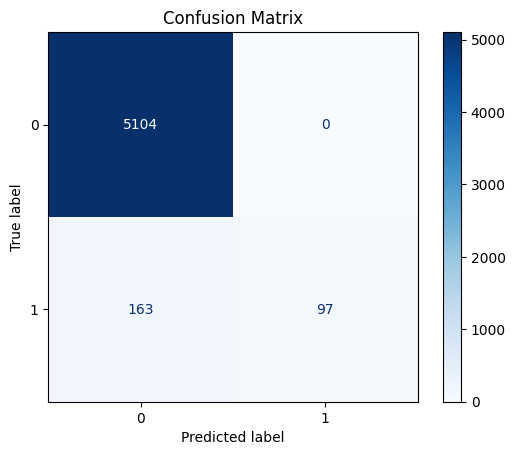

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classifier.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model = LogisticRegression()
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet','none'],
    'C': [0.01, 0.1, 1],
    'max_iter': [200]
}
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='recall',  # Optimize for recall
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

# Get the best model and its recall score
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_recall = grid_search.best_score_

In [27]:
grid_search.best_estimator_
grid_search.best_params_
grid_search.best_score_

0.28886329765614416

# <center> Random forest classifier</center>

In [28]:
classifier1 = RandomForestClassifier(n_estimators=200, criterion='gini')
classifier1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [29]:
from sklearn.metrics import accuracy_score
y_pred = classifier1.predict(X_test)
# Calculate training accuracy
training_accuracy = accuracy_score(y_test, y_pred)
print(training_accuracy)

0.982662192393736


In [30]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print("Classification Report:")

print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5104
           1       1.00      0.64      0.78       260

    accuracy                           0.98      5364
   macro avg       0.99      0.82      0.89      5364
weighted avg       0.98      0.98      0.98      5364




Confusion Matrix:
[[5104    0]
 [  93  167]]


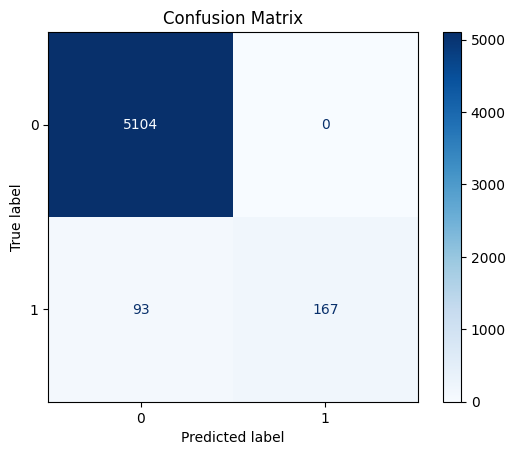

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classifier1.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [39]:
model=RandomForestClassifier()
param_grid = {
    'class_weight':['balanced'],
    'n_estimators': [200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Initialize GridSearchCV with recall as the scoring metric
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='recall',  # Optimize for recall
    cv=5,              # 5-fold cross-validation
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200]},
             scoring='recall', verbose=2)

In [40]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 200}


In [41]:
model=RandomForestClassifier(class_weight='balanced',max_depth=10,max_features='sqrt',min_samples_split=10,n_estimators=200)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=10, n_estimators=200)

In [42]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
# Calculate training accuracy
training_accuracy = accuracy_score(y_test, y_pred)
print(training_accuracy)

0.9274794929157345



Confusion Matrix:
[[4762  342]
 [  47  213]]


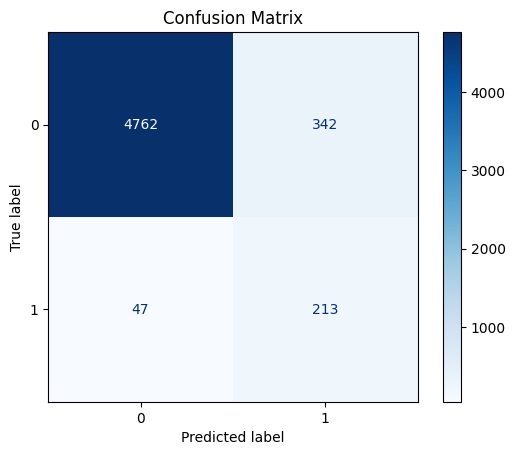

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classifier1.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# <center> Support vector machine</center>

In [ ]:
svm = SVC()

svm.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = svm.predict(X_test)
# Calculate training accuracy
training_accuracy = accuracy_score(y_test, y_pred)
print(training_accuracy)

0.9801454138702461


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print("Classification Report:")

print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3416
           1       0.98      0.57      0.72       160

    accuracy                           0.98      3576
   macro avg       0.98      0.78      0.85      3576
weighted avg       0.98      0.98      0.98      3576




Confusion Matrix:
[[3414    2]
 [  69   91]]


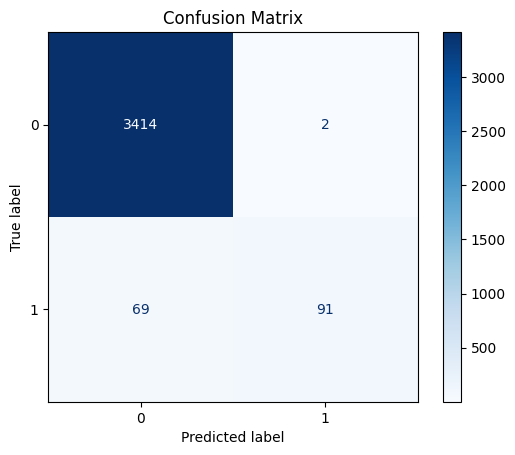

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [44]:
param_grid = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
    'degree': [3, 5],  # Only relevant for poly kernel
    'class_weight': ['balanced']  # Use class_weight for imbalanced datasets
}

# Initialize the SVM model
svm_model = SVC()

# Set up GridSearchCV with cross-validation and a focus on maximizing recall
grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring='recall',  # Optimize for recall (reducing false negatives)
    cv=5,              # 5-fold cross-validation
    n_jobs=-1,         # Use all CPU cores
    verbose=2          # Provide progress updates
)
# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1], 'class_weight': ['balanced'],
                         'degree': [3, 5], 'kernel': ['linear', 'rbf']},
             scoring='recall', verbose=2)

In [45]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'degree': 3, 'kernel': 'linear'}


In [46]:
model=SVC(C=0.1,class_weight='balanced',degree=3,kernel='linear')
model.fit(X_train, y_train)

SVC(C=0.1, class_weight='balanced', kernel='linear')

In [47]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
# Calculate training accuracy
training_accuracy = accuracy_score(y_test, y_pred)
print(training_accuracy)

0.9643922445935869


In [48]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print("Classification Report:")

print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      5104
           1       0.58      0.92      0.71       260

    accuracy                           0.96      5364
   macro avg       0.79      0.94      0.85      5364
weighted avg       0.98      0.96      0.97      5364




Confusion Matrix:
[[4934  170]
 [  21  239]]


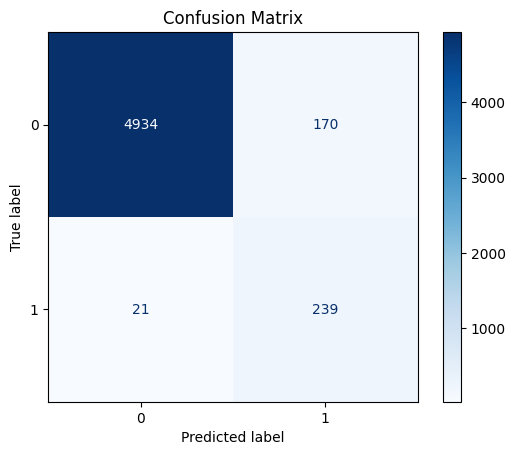

In [50]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# <center> Multinomial naive-bayes</center>

In [ ]:
modelNB = MultinomialNB(alpha=2)
modelNB.fit(X_train, y_train)

MultinomialNB(alpha=2)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = modelNB.predict(X_test)
# Calculate training accuracy
training_accuracy = accuracy_score(y_test, y_pred)
print(training_accuracy)

0.9552572706935123
